# Learning Scikit-learn: Machine Learning in Python

## Notebook for Chapter 3: Unsupervised Learning - Clustering Handwritten Digits

In [3]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np
import matplotlib.pyplot as plt
#import pylab as pl

Import digits dataset and show some of them

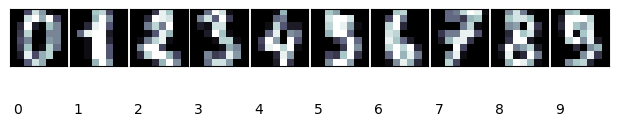

In [8]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
digits = load_digits()
data = scale(digits.data)

def print_digits(images,y,max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i < max_n and i < images.shape[0]:
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1
    
print_digits(digits.images, digits.target, max_n=10)


Build training and test set

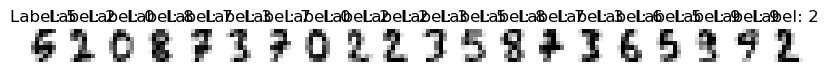

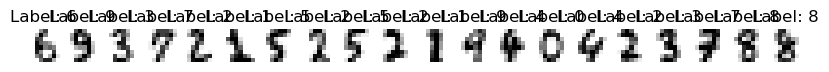

n_digits: 10, 	 n_samples 1347, 	 n_features 64


In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
    digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

# Function to print the digits images
def print_digits(images, labels, max_n=10):
    fig, axes = plt.subplots(1, max_n, figsize=(10, 1))
    for i in range(max_n):
        ax = axes[i]
        ax.set_axis_off()
        ax.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Label: %i' % labels[i])
    plt.show()

# Print digits from training and test sets
print_digits(images_train, y_train, max_n=20)
print_digits(images_test, y_test, max_n=20)

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))



## K-Means

Train a KMeans classifier, show the clusters. 

Shape of labels array: (1347,)
Cluster labels for first 10 training samples: [6 0 1 2 5 8 5 1 0 0]


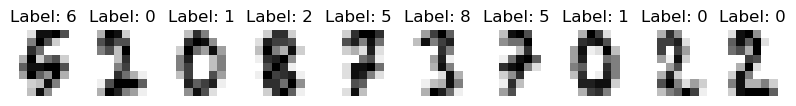

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
    digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

# Function to print the digits images
def print_digits(images, labels, max_n=10):
    fig, axes = plt.subplots(1, max_n, figsize=(10, 1))
    for i in range(max_n):
        ax = axes[i]
        ax.set_axis_off()
        ax.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Label: %i' % labels[i])
    plt.show()

# Apply KMeans clustering
clf = cluster.KMeans(init='k-means++', n_clusters=n_digits, random_state=42)
clf.fit(X_train)

# Print the shape and first few cluster labels
print("Shape of labels array:", clf.labels_.shape)
print("Cluster labels for first 10 training samples:", clf.labels_[:10])

# Visualize the cluster assignments for the first few digits
print_digits(images_train, clf.labels_, max_n=10)



Predict and show predicted clusters.

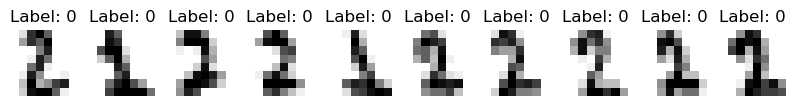

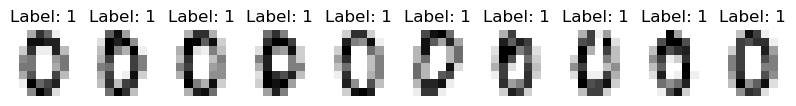

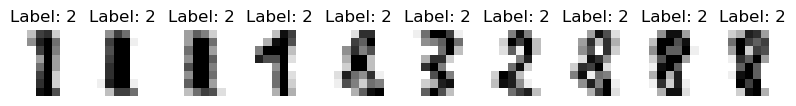

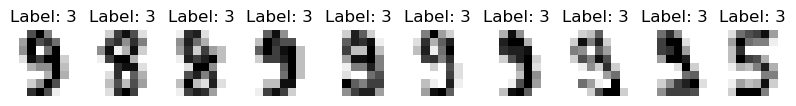

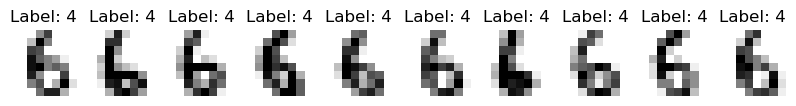

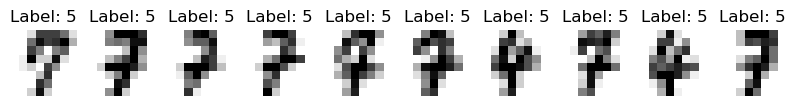

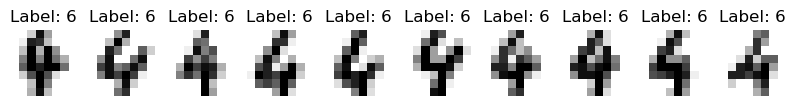

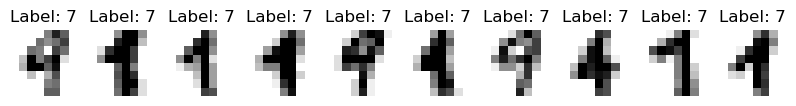

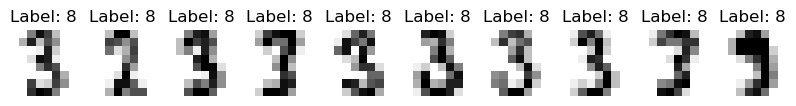

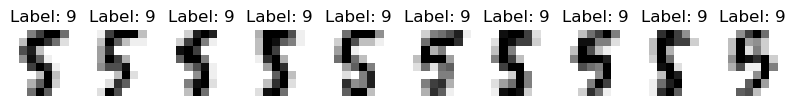

In [22]:
# Predict clusters on testing data
y_pred = clf.predict(X_test)

def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred, max_n=10)

for i in range(10):
     print_cluster(images_test, y_pred, i)


Show different performance metrics, compared with "original" clusters (using the knowb number class)

Adjusted Rand score: 0.68
Homogeneity score: 0.77
Completeness score: 0.78
Confusion matrix:
[[ 0 43  0  0  0  0  0  0  0  0]
 [ 7  0 20  0  0  0  0 10  0  0]
 [33  0  3  0  0  0  0  0  2  0]
 [ 0  0  2  3  0  1  0  0 40  0]
 [ 0  0  1  0  0  2 51  1  0  0]
 [ 0  0  0 17  1  0  0  0  0 41]
 [ 0  1  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0 21 13  0  1  0  0  1  2]
 [ 0  0  0 38  0  3  0  3  2  2]]


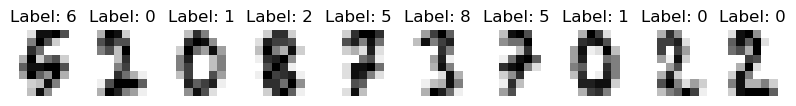

In [27]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import cluster, metrics
import numpy as np
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
    digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

# Function to print the digits images
def print_digits(images, labels, max_n=10):
    fig, axes = plt.subplots(1, max_n, figsize=(10, 1))
    for i in range(max_n):
        ax = axes[i]
        ax.set_axis_off()
        ax.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Label: %i' % labels[i])
    plt.show()

# Apply KMeans clustering
clf = cluster.KMeans(init='k-means++', n_clusters=n_digits, random_state=42)
clf.fit(X_train)

# Predict the cluster labels for the test set
y_pred = clf.predict(X_test)

# Print evaluation metrics
print("Adjusted Rand score: {:.2f}".format(metrics.adjusted_rand_score(y_test, y_pred)))
print("Homogeneity score: {:.2f}".format(metrics.homogeneity_score(y_test, y_pred))) 
print("Completeness score: {:.2f}".format(metrics.completeness_score(y_test, y_pred)))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

# Visualize the cluster assignments for the first few digits
print_digits(images_train, clf.labels_, max_n=10)


Show clusters and centroids (taken from [the scikit-learn tutorial](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html))

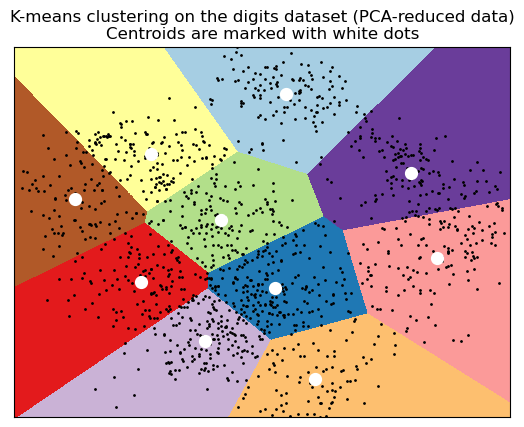

In [30]:
from sklearn import decomposition
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will asign a color to each
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

kmeans = cluster.KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_X_train)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')
#print reduced_X_train.shape

plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='.', s=169, linewidths=3,
           color='w', zorder=10)

plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
         'Centroids are marked with white dots')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Affinity Propagation

Try now using Affinity Propagation

In [36]:
# Affinity propagation
aff = cluster.AffinityPropagation()
aff.fit(X_train)
print (aff.cluster_centers_indices_.shape)




(85,)


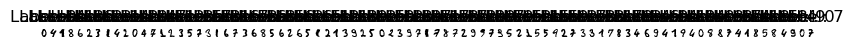

In [38]:
print_digits(images_train[aff.cluster_centers_indices_], y_train[aff.cluster_centers_indices_], max_n=aff.cluster_centers_indices_.shape[0])

Yet another clustering method: MeanShift()

In [43]:
#MeanShift
ms = cluster.MeanShift()
ms.fit(X_train)
print (ms.cluster_centers_)

[[0.00000000e+00 3.13011152e-01 5.23717472e+00 1.18304833e+01
  1.18505576e+01 5.79851301e+00 1.33308550e+00 1.13011152e-01
  5.94795539e-03 1.99702602e+00 1.02840149e+01 1.19814126e+01
  1.04037175e+01 8.27732342e+00 1.86245353e+00 1.01858736e-01
  3.71747212e-03 2.54572491e+00 9.72788104e+00 7.13680297e+00
  7.19628253e+00 7.92639405e+00 1.80297398e+00 4.68401487e-02
  1.48698885e-03 2.32118959e+00 8.92936803e+00 8.89591078e+00
  9.92267658e+00 7.54869888e+00 2.34200743e+00 2.23048327e-03
  0.00000000e+00 2.22973978e+00 7.55539033e+00 9.14275093e+00
  1.03271375e+01 8.61115242e+00 2.86542751e+00 0.00000000e+00
  1.11524164e-02 1.54126394e+00 6.88401487e+00 7.36356877e+00
  7.68252788e+00 8.21784387e+00 3.43791822e+00 3.12267658e-02
  8.92193309e-03 7.11524164e-01 7.57472119e+00 9.68327138e+00
  9.43717472e+00 8.86691450e+00 3.76431227e+00 2.09665428e-01
  7.43494424e-04 2.74349442e-01 5.58289963e+00 1.20654275e+01
  1.18327138e+01 6.82750929e+00 2.11895911e+00 3.81412639e-01]]


In [45]:
print (ms.cluster_centers_.shape)


(1, 64)


## Mixture of Gaussian Models

Now, try a Mixture of Gaussian Models

Use a heldout dataset to estimate covariance type

In [54]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import mixture, metrics
import numpy as np
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
    digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

# Define a heldout dataset to estimate covariance type
X_train_heldout, X_test_heldout, y_train_heldout, y_test_heldout = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

# Evaluate GMM with different covariance types
for covariance_type in ['spherical', 'tied', 'diag', 'full']:
    gm = mixture.GaussianMixture(n_components=10, covariance_type=covariance_type, random_state=42, n_init=5)
    gm.fit(X_train_heldout)
    y_pred = gm.predict(X_test_heldout)
    print("Adjusted rand score for covariance={}: {:.2f}".format(covariance_type, metrics.adjusted_rand_score(y_test_heldout, y_pred)))



Adjusted rand score for covariance=spherical: 0.61
Adjusted rand score for covariance=tied: 0.58
Adjusted rand score for covariance=diag: 0.52
Adjusted rand score for covariance=full: 0.54


Train!

In [59]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import mixture, metrics
import numpy as np

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
    digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

# Fit Gaussian Mixture Model with 'tied' covariance type
gm = mixture.GaussianMixture(n_components=10, covariance_type='tied', random_state=42)
gm.fit(X_train)

# Predict the cluster labels for the test set
y_pred = gm.predict(X_test)

# Print evaluation metrics
print("Adjusted Rand score: {:.2f}".format(metrics.adjusted_rand_score(y_test, y_pred)))
print("Homogeneity score: {:.2f}".format(metrics.homogeneity_score(y_test, y_pred))) 
print("Completeness score: {:.2f}".format(metrics.completeness_score(y_test, y_pred)))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Adjusted Rand score: 0.59
Homogeneity score: 0.72
Completeness score: 0.74
Confusion matrix:
[[ 1  0 42  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0 19 11  0  0]
 [ 0  4  0  3 29  2  0  0  0  0]
 [ 0  1  0 16  0 29  0  0  0  0]
 [39  1  0  0  0  0  9  5  1  0]
 [ 0  0  0  0  0  5  0  0  0 54]
 [45  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  1 36  0]
 [ 0 22  0 13  0  0  3  0  0  0]
 [ 0  6  0  1  0 39  1  1  0  0]]


Adjusted Rand score: 0.59
Homogeneity score: 0.72
Completeness score: 0.74
Confusion matrix:
[[ 1  0 42  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0 19 11  0  0]
 [ 0  4  0  3 29  2  0  0  0  0]
 [ 0  1  0 16  0 29  0  0  0  0]
 [39  1  0  0  0  0  9  5  1  0]
 [ 0  0  0  0  0  5  0  0  0 54]
 [45  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  1 36  0]
 [ 0 22  0 13  0  0  3  0  0  0]
 [ 0  6  0  1  0 39  1  1  0  0]]


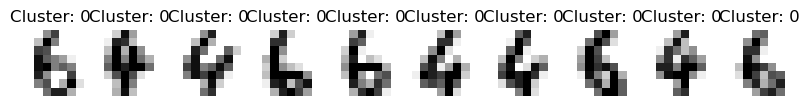

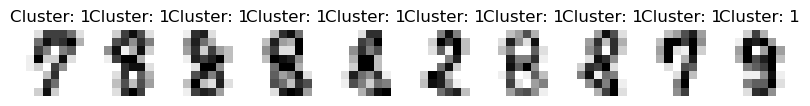

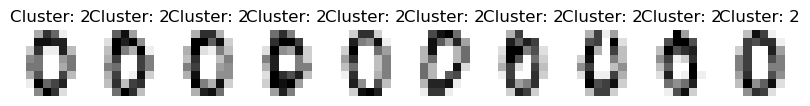

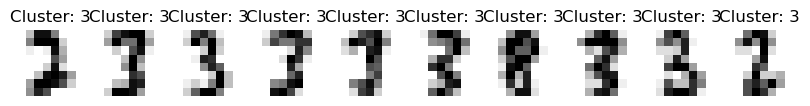

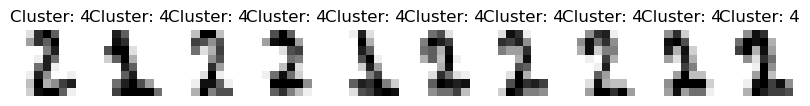

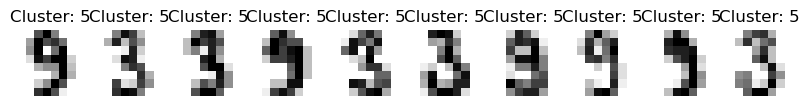

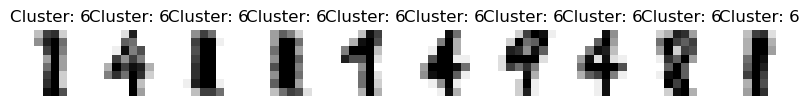

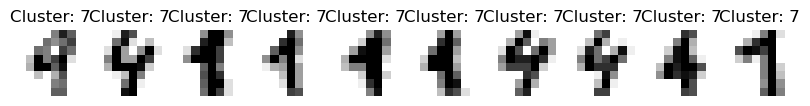

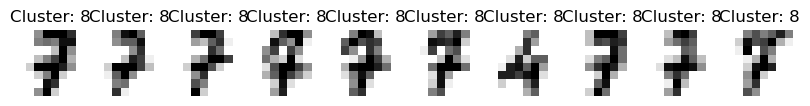

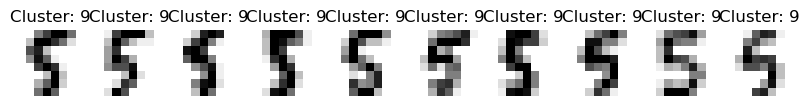

In [63]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import mixture, metrics
import numpy as np
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
    digits.data, digits.target, digits.images, test_size=0.25, random_state=42)

# Fit Gaussian Mixture Model with 'tied' covariance type
gm = mixture.GaussianMixture(n_components=10, covariance_type='tied', random_state=42)
gm.fit(X_train)

# Predict the cluster labels for the test set
y_pred = gm.predict(X_test)

# Print evaluation metrics
print("Adjusted Rand score: {:.2f}".format(metrics.adjusted_rand_score(y_test, y_pred)))
print("Homogeneity score: {:.2f}".format(metrics.homogeneity_score(y_test, y_pred))) 
print("Completeness score: {:.2f}".format(metrics.completeness_score(y_test, y_pred)))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

# Function to print the digits images for each cluster
def print_cluster(images, labels, cluster_id, max_n=10):
    cluster_images = images[labels == cluster_id]
    fig, axes = plt.subplots(1, min(max_n, len(cluster_images)), figsize=(10, 1))
    for i in range(min(max_n, len(cluster_images))):
        ax = axes[i]
        ax.set_axis_off()
        ax.imshow(cluster_images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Cluster: %i' % cluster_id)
    plt.show()

# Print clusters
for i in range(10):
     print_cluster(images_test, y_pred, i)


Predict!

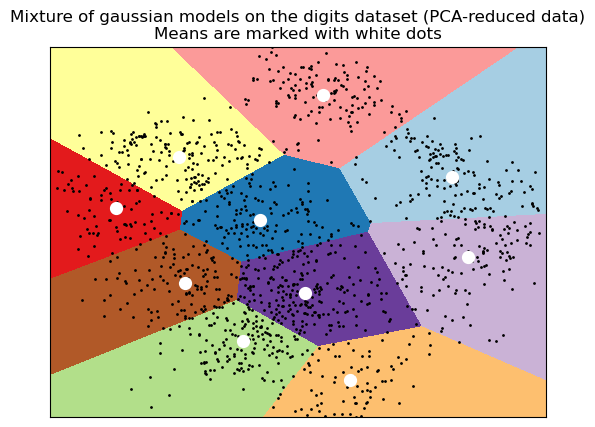

In [65]:
pl=plt
from sklearn import decomposition
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will asign a color to each
# Taken from 
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

gm.fit(reduced_X_train)
#print np.c_[xx.ravel(),yy.ravel()]
Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1)
pl.clf()
pl.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=pl.cm.Paired,
          aspect='auto', origin='lower')
#print reduced_X_train.shape

pl.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = gm.means_

pl.scatter(centroids[:, 0], centroids[:, 1],
           marker='.', s=169, linewidths=3,
           color='w', zorder=10)

pl.title('Mixture of gaussian models on the digits dataset (PCA-reduced data)\n'
         'Means are marked with white dots')
pl.xlim(x_min, x_max)
pl.ylim(y_min, y_max)
pl.xticks(())
pl.yticks(())
pl.show()